In [1]:
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN
from surprise import Dataset, Reader, accuracy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime as dt
from scipy.stats import spearmanr

In [120]:
data_df = pd.read_csv("data/ml-100k/u.data", sep="\t")
#data_df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", header=None)
data_df.columns = ["user_id", "item_id", "rating", "timestamp"]
data_df.drop(columns=["timestamp"], axis=1, inplace=True)
data_df["user_id"] = data_df["user_id"].map({b: a for a, b in enumerate(data_df["user_id"].unique())})
data_df["item_id"] = data_df["item_id"].map({b: a for a, b in enumerate(data_df["item_id"].unique())})


reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data_df, reader=reader)
raw_trainset = [(ruid, riid, r, None) for ruid, riid, r in data_df.to_records(index=False)]
trainset = dataset.construct_trainset(raw_trainset)

In [121]:
cosine = UserKNN.compute_similarities(trainset, min_support=1)
popularity = UserKNN.compute_popularities(trainset)
gain = UserKNN.compute_gain(trainset)

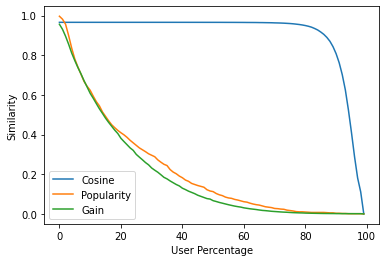

In [132]:
counts, bins = np.histogram(cosine, bins=100)
pdf = counts / np.sum(counts)
cdf = np.cumsum(pdf)
ccdf = 1 - cdf
plt.plot(ccdf, label="Cosine")

counts, bins = np.histogram(popularity, bins=100)
pdf = counts / np.sum(counts)
cdf = np.cumsum(pdf)
ccdf = 1 - cdf
plt.plot(ccdf, label="Popularity")

counts, bins = np.histogram(gain, bins=100)
pdf = counts / np.sum(counts)
cdf = np.cumsum(pdf)
ccdf = 1 - cdf
plt.plot(ccdf, label="Gain")

plt.ylabel("Similarity")
plt.xlabel("User Percentage")
plt.legend()

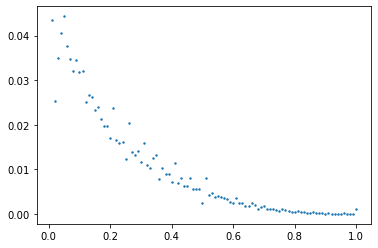

In [130]:
counts, bins = np.histogram(gain, bins=100)
pdf = counts / np.sum(counts)
plt.scatter(bins[1:], pdf, s=2)